In [1]:
import pandas as pd 
import quandl
import requests 
import json 
import numpy as np
import datetime 
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = 'iuyxJf4t-zGAW3ypiHCK'

In [3]:
data_BTCUSD = quandl.get("BCHAIN/MKPRU",start_date="2023-01-01",end_date="2023-03-01")
df_BTCUSD = pd.DataFrame(data_BTCUSD)
df_BTCUSD

,Value
Date,
2023-01-01,16526.78
2023-01-02,16613.71
2023-01-03,16671.54
2023-01-04,16669.60
2023-01-05,16850.63
2023-01-06,16826.41
2023-01-07,16951.97
2023-01-08,16945.20
2023-01-09,17108.41


In [4]:
api_key = '052b466bf6d2f918355d7ba01d65b6f074d6b52f5e34830614aa599ca3e9de03'
url = 'https://min-api.cryptocompare.com/data/histoday'
params = {'api_key': api_key,
          'fsym': 'BTC',
          'tsym': 'USD',
          'limit': 2000,
          'aggregate': 1}
response = requests.get(url, params=params)
data = response.json()['Data']
df = pd.DataFrame(data)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df = df[['volumefrom']]
df = df.loc['2023-01-01':'2023-03-01']
df

,volumefrom
time,
2023-01-01,20256.16
2023-01-02,30159.75
2023-01-03,37684.59
2023-01-04,58841.99
2023-01-05,31174.48
2023-01-06,52488.70
2023-01-07,11628.45
2023-01-08,21159.60
2023-01-09,73779.59


In [5]:
x = df_BTCUSD.values
y = df.values

Text(0, 0.5, 'y')

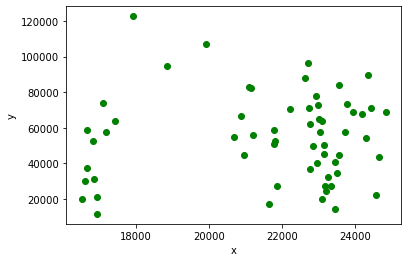

In [6]:
plt.plot(x,y,'go')
plt.xlabel("x")
plt.ylabel("y")

In [7]:
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 43996.155966960956 
beta = 0.5030628071220687


In [8]:
type((np.multiply(y, x)))

numpy.ndarray

In [9]:
y_hat = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - y_hat,y - y_hat))
L

34940632470.45818